# Evaluation, relevant feedback and query expansion
Build on top of wikipedia pages

In [1]:
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm

In [2]:
import urllib.request
import json

## Get the data

In [3]:
url = 'http://island.ricerca.di.unimi.it/~alfio/shared/inforet/wikipeople.json'
data = urllib.request.urlopen(url).read()

In [4]:
D = json.loads(data)

In [6]:
D[0]

{'docid': 'Q868_1',
 'entity': 'Q868',
 'target': 'Aristotle (ancient Greek philosopher)',
 'wikipage': 'https://en.wikipedia.org/wiki/Aristotle',
 'query': 'Aristotle philosopher',
 'document': 'Aristotle (/ærɪsˈtɒtəl/;[3] Greek: Ἀριστοτέλης Aristotélēs, pronounced\xa0[aristotélɛːs]; 384–322\xa0BC) was a Greek philosopher and polymath during the Classical period in Ancient Greece. Taught by Plato, he was the founder of the Lyceum, the Peripatetic school of philosophy, and the Aristotelian tradition. His writings cover many subjects including physics, biology, zoology, metaphysics, logic, ethics, aesthetics, poetry, theatre, music, rhetoric, psychology, linguistics, economics, politics, and government. Aristotle provided a complex synthesis of the various philosophies existing prior to him. It was above all from his teachings that the West inherited its intellectual lexicon, as well as problems and methods of inquiry. As a result, his philosophy has exerted a unique influence on almost

In [11]:
set([x['query'] for x in D])

{'Abraham Lincoln film D. W. Griffith',
 'Abraham Lincoln grandfather president Abraham Lincoln',
 'Abraham Lincoln painting George P.A. Healy',
 'Abraham Lincoln president United States',
 'Aristotle Irish racehorse',
 'Aristotle painting Jusepe de Ribera',
 'Aristotle philosopher',
 'Chemnitz city Germany',
 'Jesus film Peter Sykes John Krish',
 'Jesus name',
 'Jesus preacher leader figure Christianity',
 'Julius Caesar English judge',
 'Julius Caesar Roman statesman dictator BC-44 BC',
 'Julius Caesar film Joseph L. Mankiewicz',
 'Julius Caesar play William Shakespeare',
 'Karl Marx asteroid',
 'Karl Marx composer',
 'Leipzig University university Leipzig Germany',
 'Muhammad Khan throne Ilkhanate',
 'Muhammad leader founder Islam',
 'Muhammad name',
 'Napoleon city',
 'Napoleon city Lafayette County Missouri United States',
 'Napoleon city county seat Henry County Ohio United States',
 'Napoleon general emperor',
 'Napoléon film Abel Gance',
 'Statue Abraham Lincoln Lincoln Memoria

## Example of preparing data

In [12]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

### Documents

In [13]:
vectorizer = TfidfVectorizer(tokenizer=nltk.word_tokenize)
documents = vectorizer.fit_transform([x['document'] for x in D])

### Queries

In [14]:
query_texts = list(set([(x['query'], x['entity']) for x in D]))
queries = vectorizer.transform([x[0] for x in query_texts])

In [15]:
print(documents.shape, queries.shape)

(1139, 15716) (33, 15716)


In [23]:
query_texts

[('Statue Abraham Lincoln Lincoln Memorial Washington D.C.', 'Q4669005'),
 ('Jesus film Peter Sykes John Krish', 'Q575248'),
 ('Winston Churchill statesman army officer writer', 'Q8016'),
 ('Napoleon city county seat Henry County Ohio United States', 'Q986312'),
 ('Julius Caesar play William Shakespeare', 'Q215750'),
 ('Abraham Lincoln painting George P.A. Healy', 'Q10322725'),
 ('Abraham Lincoln film D. W. Griffith', 'Q166089'),
 ('Aristotle philosopher', 'Q868'),
 ('Winston Churchill novelist', 'Q715814'),
 ('Napoléon film Abel Gance', 'Q1632158'),
 ('Napoleon city', 'Q996166'),
 ('Abraham Lincoln president United States', 'Q91'),
 ('Julius Caesar Roman statesman dictator BC-44 BC', 'Q1048'),
 ('Muhammad Khan throne Ilkhanate', 'Q5964503'),
 ('Napoleon city Lafayette County Missouri United States', 'Q958465'),
 ('Julius Caesar English judge', 'Q1712531'),
 ('Abraham Lincoln grandfather president Abraham Lincoln', 'Q2821841'),
 ('Aristotle Irish racehorse', 'Q25171593'),
 ('Karl Marx 

## Show

In [16]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [17]:
pca = PCA(n_components=2)
v_docs = pca.fit_transform(documents.toarray())
v_queries = pca.transform(queries.toarray())

In [18]:
target_map = dict([(x['entity'], i) for i, x in enumerate(D)])
target = [target_map[x['entity']] for x in D]
q_target = [target_map[x[1]] for x in query_texts]
q_labels = [x[0] for x in query_texts]

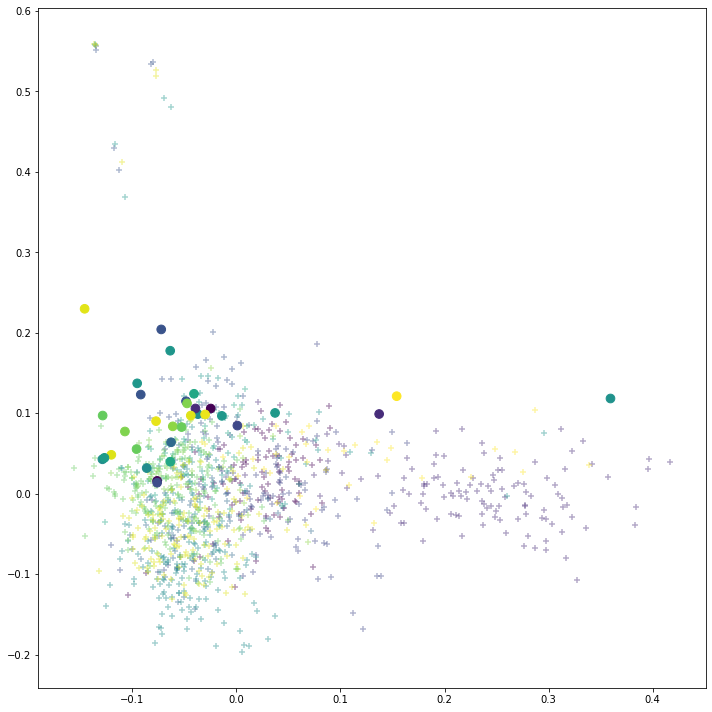

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(v_docs[:,0], v_docs[:,1], marker='+', c=target, alpha=0.4)
ax.scatter(v_queries[:,0], v_queries[:,1], marker='.', s=300, c=q_target)
plt.tight_layout()
plt.show()

## Search

In [20]:
from sklearn.metrics.pairwise import cosine_similarity

In [21]:
sigma = cosine_similarity(queries, documents)

In [22]:
Q = 6 
print(q_labels[Q], '\n')
for i, w in sorted(enumerate(sigma[Q]), key=lambda x: -x[1]):
    d = D[i]
    print(d['docid'], d['target'], w)
    print(d['document'], '\n')

Abraham Lincoln film D. W. Griffith 

Q166089_1 Abraham Lincoln (1930 film by D. W. Griffith) 0.5355426942168062
Abraham Lincoln, also released under the title D. W. Griffith's "Abraham Lincoln", is a 1930 pre-Code American biographical film about Abraham Lincoln directed by D. W. Griffith.  It stars Walter Huston as Lincoln and Una Merkel, in her second speaking role, as Ann Rutledge. Her first speaking role was in a short film, Love's Old Sweet Song (1923) filmed in the Phonofilm sound-on-film process. The script was co-written by Stephen Vincent Benét, author of the Civil War prose poem John Brown's Body, and Gerrit Lloyd. This was the first of only two sound films made by Griffith.
 

Q166089_7 Abraham Lincoln (1930 film by D. W. Griffith) 0.23520596918400194
Abraham Lincoln is part of the David Wark Griffith collection at the Museum of Modern Art, and it was donated as a gift from screenwriter-producer Paul Killiam, a  collector of silent movies. Funding for the preservation of th

Q302_8 Jesus (Jewish preacher and religious leader, central figure of Christianity) 0.0
The name Yeshua appears to have been in use in Judea at the time of the birth of Jesus.[57] The 1st-century works of historian Flavius Josephus, who wrote in Koine Greek, the same language as that of the New Testament,[58] refer to at least twenty different people with the name Jesus (i.e. Ἰησοῦς).[59] The etymology of Jesus' name in the context of the New Testament is generally given as "Yahweh is salvation".[60]
 

Q302_9 Jesus (Jewish preacher and religious leader, central figure of Christianity) 0.0
Since the early period of Christianity, Christians have commonly referred to Jesus as "Jesus Christ".[61] "Jesus Christ" is the name that the author of the Gospel of John claims Jesus gave to himself during his high priestly prayer.[62] The word Christ was a title or office ("the Christ"), not a given name.[63][64] It derives from the Greek Χριστός (Christos),[48][65] a translation of the Hebrew mash

Q2795_23 Chemnitz (city in Germany) 0.0
One week after the protests, a free "Concert against the Right" under the motto "We are more" (#wirsindmehr) attracted an audience of some 65,000 people.[19] A one-minute silence commemorated the murdered Daniel H., the son of a German mother and a Cuban father.[20] The concert itself has been criticized for far-left activities and violent song texts of some of the participating bands.[21][22]
 

Q2795_26 Chemnitz (city in Germany) 0.0
Tourist sights include the Kassberg neighborhood with 18th and 19th century buildings and the Karl Marx Monument by Lev Kerbel, nicknamed Nischel (a Saxon dialect word for head) by the locals. Landmarks include the Old Town Hall with its Renaissance portal (15th century), the castle on the site of the former monastery, and the area around the opera house and the old university. The most conspicuous landmark is the red tower built in the late 12th or early 13th century as part of the city wall.
 

Q2795_28 Chemnitz 

Q25171593_6 Aristotle (Irish-bred Thoroughbred racehorse) 0.0
On his three-year-old debut, Aristotle was sent to France for the Group Two Prix Greffulhe over 2100 metres on heavy ground at Longchamp Racecourse on 23 April. Ridden by Kinane, he took the lead 800 metres from the finish and drew clear in the closing stages and won by three and a half lengths from Rhenium. However, he had veered left repeatedly in the straight, hampering the third-placed finisher Boutron, and after an inquiry by the racecourse stewards he was disqualified and demoted to third.[10] Kinane commented "Aristotle ducked to the left on three occasions. It was something he's never done before. If he'd kept straight, we'd have won the race by 10 lengths".[11][12]
 

Q25171593_7 Aristotle (Irish-bred Thoroughbred racehorse) 0.0
On 10 June, Aristotle was one of fifteen colts to contest the 2000 Epsom Derby at and started the 5/1 third choice in the betting behind Beat Hollow and Sakhee. O'Brien had been in very conf

Q517_148 Napoleon (French general and emperor (1769-1821)) 0.0
Denis Davydov met him personally and considered him remarkably average in appearance: "His face was slightly swarthy, with regular features. His nose was not very large, but straight, with a slight, hardly noticeable bend. The hair on his head was dark reddish-blond; his eyebrows and eyelashes were much darker than the colour of his hair, and his blue eyes, set off by the almost black lashes, gave him a most pleasing expression ... The man I saw was of short stature, just over five feet tall, rather heavy although he was only 37 years old."[268]
 

Q517_149 Napoleon (French general and emperor (1769-1821)) 0.0
During the Napoleonic Wars he was taken seriously by the British press as a dangerous tyrant, poised to invade. Napoleon was mocked in British newspapers as a short tempered small man and he was nicknamed "Little Boney in a strong fit".[269] A nursery rhyme warned children that Bonaparte ravenously ate naughty people;

In [28]:
def search(Q):
    qt, qe = query_texts[Q]
    answers = [(D[i]['entity'], w) for i, w in sorted(enumerate(sigma[Q]), key=lambda x: -x[1])]
    y_pred, scores = [], []
    for e, score in answers:
        if e == qe:
            y_pred.append(1)
        else:
            y_pred.append(0)
        scores.append(score)
    return y_pred, scores

In [29]:
y, s = search(1)

In [47]:
len(s)

1139

In [49]:
rs = np.random.uniform(0, 1, len(s))

In [32]:
from sklearn.metrics import precision_recall_curve

In [53]:
precision, recall, thresholds = precision_recall_curve(y, s)

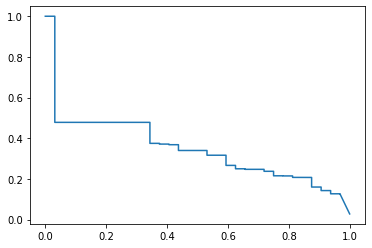

In [55]:
fig, ax = plt.subplots()
ax.plot(recall, I)
plt.show()

In [44]:
I = []
for i, p in enumerate(precision):
    I.append(max(precision[:i+1]))

In [45]:
I

[0.028094820017559263,
 0.124,
 0.12449799196787148,
 0.125,
 0.12550607287449392,
 0.12601626016260162,
 0.12653061224489795,
 0.12704918032786885,
 0.12704918032786885,
 0.12704918032786885,
 0.12704918032786885,
 0.12704918032786885,
 0.12704918032786885,
 0.12704918032786885,
 0.12704918032786885,
 0.1271186440677966,
 0.1276595744680851,
 0.1282051282051282,
 0.12875536480686695,
 0.12931034482758622,
 0.12987012987012986,
 0.13043478260869565,
 0.13100436681222707,
 0.13157894736842105,
 0.13215859030837004,
 0.13274336283185842,
 0.13333333333333333,
 0.13392857142857142,
 0.13452914798206278,
 0.13513513513513514,
 0.13574660633484162,
 0.13636363636363635,
 0.136986301369863,
 0.13761467889908258,
 0.1382488479262673,
 0.1388888888888889,
 0.13953488372093023,
 0.14018691588785046,
 0.14084507042253522,
 0.14150943396226415,
 0.14218009478672985,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
 0.14285714285714285,
